# IONOSPHERE Dataset

## Data Exploration

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
## Optimization and Baseline Model Creation
import pandas as pd

# Define the file path in Google Drive
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/ionosphere_data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Display the first few rows to ensure it has been loaded correctly
data.head()

,column_a,column_b,column_c,column_d,column_e,column_f,column_g,column_h,column_i,column_j,...,column_z,column_aa,column_ab,column_ac,column_ad,column_ae,column_af,column_ag,column_ah,column_ai
0,True,False,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,True,False,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,True,False,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,True,False,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,True,False,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [19]:
# Check for missing values
missing_values = data.isnull().sum()

# Display columns with missing values
missing_columns = missing_values[missing_values > 0]
missing_columns

,0


## Optimization and Baseline Model Creation

In [20]:
# Import necessary libraries
import pandas as pd
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Define the file path in Google Drive
file_path = '/content/drive/MyDrive/MSc Dessertation/DATASETS/ionosphere_data.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Encode the categorical labels in 'column_ai'
label_encoder = LabelEncoder()
data['column_ai'] = label_encoder.fit_transform(data['column_ai'])  # 'g' -> 1, 'b' -> 0

# Separate features and target
X = data.drop(columns=['column_ai'])
y = data['column_ai']

# Print the number of features
print("Number of features:", X.shape[1])

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train a baseline logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
r2_Baseline = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", r2_Baseline)
print("\nClassification Report:\n", classification_rep)


Number of features: 34
Accuracy: 0.8773584905660378

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.81        39
           1       0.85      0.99      0.91        67

    accuracy                           0.88       106
   macro avg       0.91      0.84      0.86       106
weighted avg       0.89      0.88      0.87       106



Accuracy: 0.8773584905660378

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.69      0.81        39
           1       0.85      0.99      0.91        67

    accuracy                           0.88       106
   macro avg       0.91      0.84      0.86       106
weighted avg       0.89      0.88      0.87       106



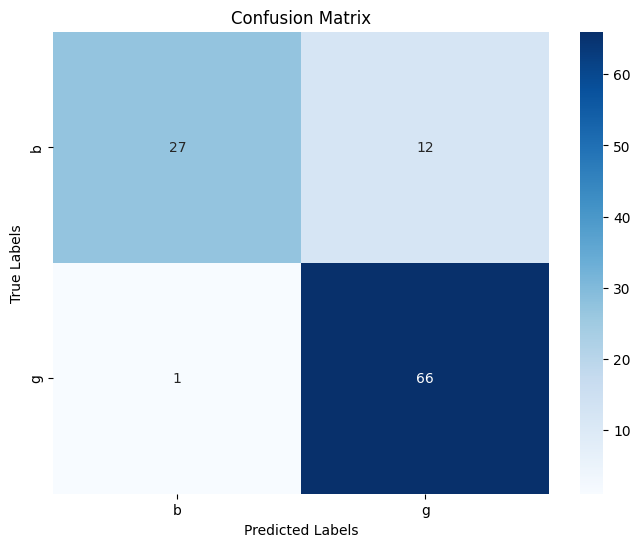

In [21]:
# Import necessary libraries for the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the entire dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the accuracy
r2_Baseline = accuracy_score(y_test, y_pred)

# Evaluate the classification report
classification_rep = classification_report(y_test, y_pred)

# Print the results
print("Accuracy:", r2_Baseline)
print("\nClassification Report:\n", classification_rep)

# Calculate and visualize the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



## Applying Stochastic Diffusion Search (SDS)

In [22]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Basic SDS implementation for feature selection
class SDS:
    def __init__(self, n_agents, n_iterations, threshold):
        self.n_agents = n_agents
        self.n_iterations = n_iterations
        self.threshold = threshold

    def initialize_agents(self, n_features):
        # Randomly initialize agent hypotheses (feature subsets) as binary arrays
        self.agents = np.random.randint(0, 2, (self.n_agents, n_features))

    def evaluate_agent(self, agent, X, y):
        # Select the features according to the agent's binary hypothesis
        selected_features = np.where(agent == 1)[0]

        if len(selected_features) == 0:
            return 0  # If no features are selected, return 0 accuracy

        # Train a simple Logistic Regression model on the selected features
        X_selected = X[:, selected_features]
        model = LogisticRegression(random_state=42)
        model.fit(X_selected, y)

        # Predict on the same data (for simplicity in this basic implementation)
        y_pred = model.predict(X_selected)

        # Return accuracy as the fitness score of the agent
        return accuracy_score(y, y_pred)

    def diffuse(self):
        # Agents exchange information with a neighbor and update their hypothesis
        for i in range(self.n_agents):
            neighbor = np.random.randint(0, self.n_agents)
            if np.random.rand() < self.threshold:
                self.agents[i] = self.agents[neighbor]

    def fit(self, X, y):
        n_features = X.shape[1]
        self.initialize_agents(n_features)

        for iteration in range(self.n_iterations):
            scores = np.array([self.evaluate_agent(agent, X, y) for agent in self.agents])
            best_agent = self.agents[np.argmax(scores)]

            # Diffuse knowledge across the population
            self.diffuse()

            # Allow agents to adopt the best agent's hypothesis
            for i in range(self.n_agents):
                if np.random.rand() < self.threshold:
                    self.agents[i] = best_agent

        self.best_agent = best_agent
        self.best_score = max(scores)

    def transform(self, X):
        selected_features = np.where(self.best_agent == 1)[0]
        return X[:, selected_features], selected_features

# Encode the categorical labels in 'column_ai'
label_encoder = LabelEncoder()
data['column_ai'] = label_encoder.fit_transform(data['column_ai'])  # 'g' -> 1, 'b' -> 0

# Separate features and target
X = data.drop(columns=['column_ai'])
y = data['column_ai']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SDS for feature reduction
n_agents = 100
n_iterations = 50
threshold = 0.5

sds = SDS(n_agents=n_agents, n_iterations=n_iterations, threshold=threshold)
sds.fit(X_train, y_train)

# Get the reduced feature set
X_train_reduced, selected_features = sds.transform(X_train)
X_test_reduced = X_test[:, selected_features]

# Train the logistic regression model on the reduced feature set
logreg_reduced = LogisticRegression(random_state=42)
logreg_reduced.fit(X_train_reduced, y_train)

# Make predictions and evaluate the model
y_pred_reduced = logreg_reduced.predict(X_test_reduced)
SDSfinal_r2_score = accuracy_score(y_test, y_pred_reduced)

# Print reduced features, number of selected features, and accuracy
print("Selected Features:", selected_features)
print("Number of selected features:", len(selected_features))
print("Accuracy after SDS feature reduction:", SDSfinal_r2_score)


Selected Features: [ 0  5  6  7  9 10 14 16 20 21 22 26 28 29 33]
Number of selected features: 15
Accuracy after SDS feature reduction: 0.9150943396226415


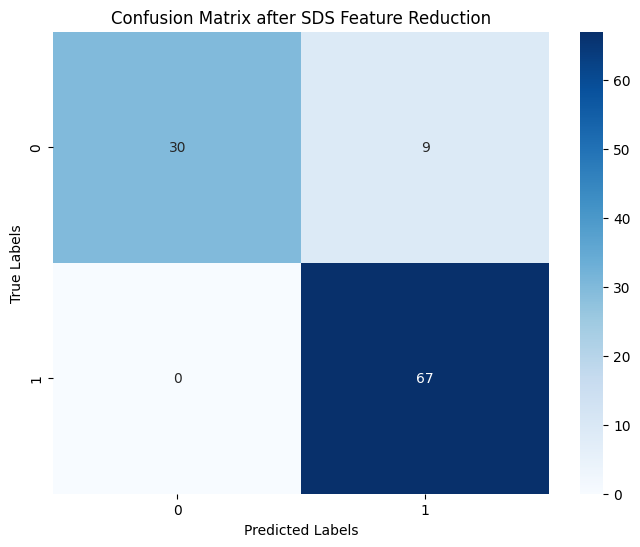

Confusion Matrix:
 [[30  9]
 [ 0 67]]


In [23]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_reduced)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix after SDS Feature Reduction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print additional results
print("Confusion Matrix:\n", conf_matrix)


## Applying Principal Component Analysis (PCA)

In [24]:
 # Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Encode the categorical labels in 'column_ai'
label_encoder = LabelEncoder()
data['column_ai'] = label_encoder.fit_transform(data['column_ai'])  # 'g' -> 1, 'b' -> 0

# Separate features and target
X = data.drop(columns=['column_ai'])
y = data['column_ai']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply PCA to reduce the number of features
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train the logistic regression model on the reduced feature set
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_pca, y_train)

# Make predictions and evaluate the model
y_pred_pca = logreg.predict(X_test_pca)
PCAfinal_r2_score = accuracy_score(y_test, y_pred_pca)

# Print the reduced features and accuracy
print("Number of features before PCA:", X.shape[1])
print("Number of features after PCA:", X_train_pca.shape[1])
print("Accuracy after PCA feature reduction:", PCAfinal_r2_score)


Number of features before PCA: 34
Number of features after PCA: 22
Accuracy after PCA feature reduction: 0.8962264150943396


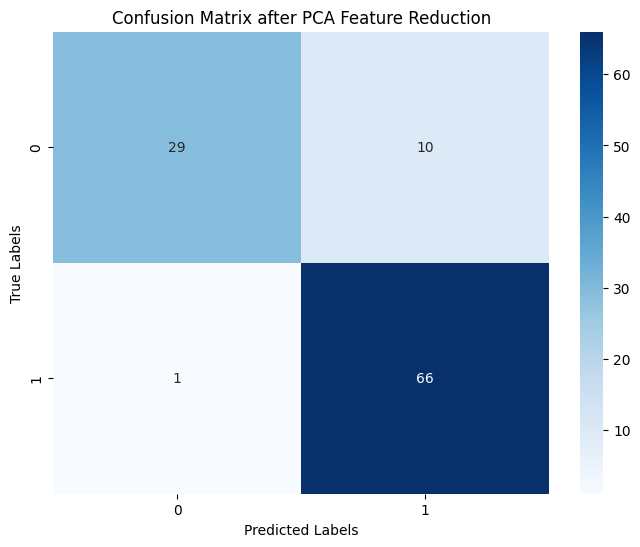

Confusion Matrix:
 [[29 10]
 [ 1 66]]


In [25]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_pca)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix after PCA Feature Reduction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print additional results
print("Confusion Matrix:\n", conf_matrix)


## Applying Recursive Feature Elimination (RFE)

In [26]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE

# Encode the categorical labels in 'column_ai'
label_encoder = LabelEncoder()
data['column_ai'] = label_encoder.fit_transform(data['column_ai'])  # 'g' -> 1, 'b' -> 0

# Separate features and target
X = data.drop(columns=['column_ai'])
y = data['column_ai']

# Standardize the numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize the Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Apply RFE to select the top features
n_features_to_select = 10  # You can adjust this number based on how many features you want to keep
rfe = RFE(estimator=logreg, n_features_to_select=n_features_to_select)
rfe.fit(X_train, y_train)

# Get the reduced feature set
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Train the logistic regression model on the reduced feature set
logreg.fit(X_train_rfe, y_train)

# Make predictions and evaluate the model
y_pred_rfe = logreg.predict(X_test_rfe)
RFEfinal_r2_score = accuracy_score(y_test, y_pred_rfe)

# Print the selected features, accuracy, and number of features after RFE
print("Number of features before RFE:", X.shape[1])
print("Number of features after RFE:", rfe.support_.sum())
print("Selected Features (True for selected):", rfe.support_)
print("Accuracy after RFE feature reduction:", RFEfinal_r2_score)


Number of features before RFE: 34
Number of features after RFE: 10
Selected Features (True for selected): [ True False  True False False False  True  True False False False False
 False False False False False False False False False  True False False
  True False  True False False  True  True False False  True]
Accuracy after RFE feature reduction: 0.8773584905660378


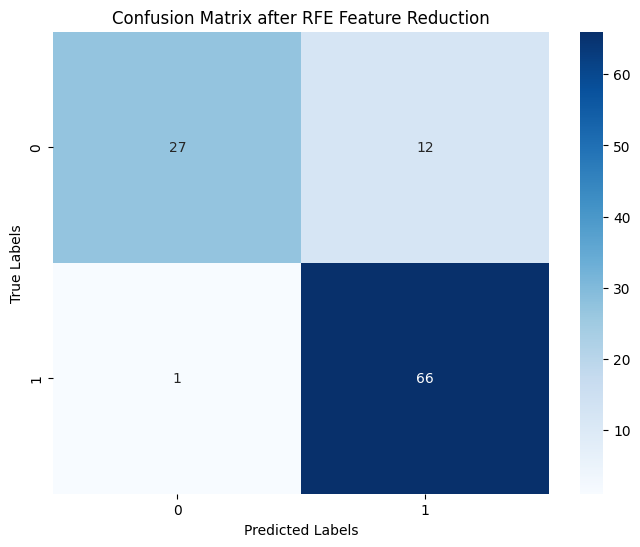

Confusion Matrix:
 [[27 12]
 [ 1 66]]


In [27]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_rfe)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix after RFE Feature Reduction')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print additional results
print("Confusion Matrix:\n", conf_matrix)


## Applying Filter Method - Mutual Information

In [28]:
from sklearn.feature_selection import mutual_info_classif
import numpy as np

# Calculate mutual information for all features
mi_scores = mutual_info_classif(X_train, y_train)

# Select top k features based on mutual information
k = 30  # Number of features to select (adjust this as needed)
top_k_indices = np.argsort(mi_scores)[-k:]
X_train_filter = X_train[:, top_k_indices]
X_test_filter = X_test[:, top_k_indices]

# Train a logistic regression model on the selected features
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_filter, y_train)

# Evaluate the model
y_pred_filter = logreg.predict(X_test_filter)
filter_r2_score = accuracy_score(y_test, y_pred_filter)

# Number of selected features
filter_features = X_train_filter.shape[1]
print(f"Accuracy after Mutual Information (Filter Method): {filter_r2_score}")
print(f"Number of features after Mutual Information: {filter_features}")


Accuracy after Mutual Information (Filter Method): 0.8679245283018868
Number of features after Mutual Information: 30


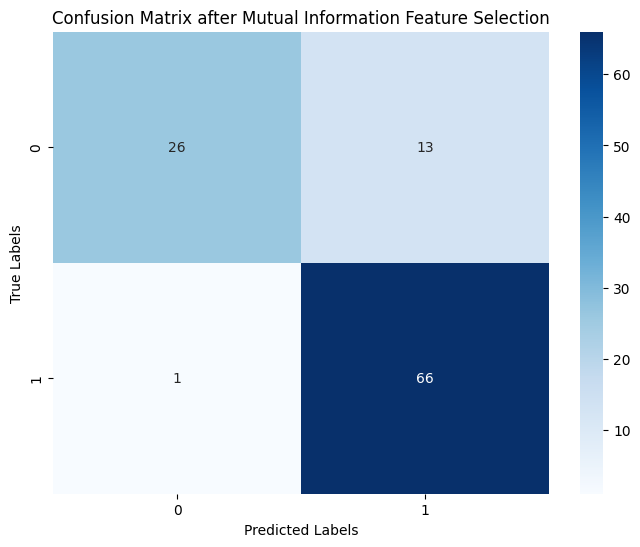

Confusion Matrix:
 [[26 13]
 [ 1 66]]


In [29]:
# Import necessary libraries for confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_filter)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix after Mutual Information Feature Selection')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Print the confusion matrix
print("Confusion Matrix:\n", conf_matrix)


## Model Performance Comparison and Visualization of Models

In [30]:
# Baseline model accuracies and features (assuming these were already calculated and stored)
baseline_r2 = r2_Baseline
baseline_features = X.shape[1]  # total features before any feature selection

# SDS model accuracies and features
sds_r2 = SDSfinal_r2_score  # this should be directly from the SDS output
sds_features = len(selected_features)  # directly from the SDS output

# RFE model accuracies and features
rfe_r2 = RFEfinal_r2_score
rfe_features = rfe.support_.sum()  # from the RFECV model after fitting

# PCA model accuracies and features
pca_r2 = PCAfinal_r2_score
pca_features = X_train_pca.shape[1]  # number of features after applying PCA

# Mutual Information (Filter Method) accuracies and features
filter_r2 = filter_r2_score  # from the Mutual Information filter method evaluation
filter_features = X_train_filter.shape[1]  # number of features selected by the filter method

# Compile all the data into a dictionary for easier comparison
model_performances = {
    'Baseline': {'R2 Score': baseline_r2, 'Number of Features': baseline_features},
    'SDS': {'R2 Score': sds_r2, 'Number of Features': sds_features},
    'RFE': {'R2 Score': rfe_r2, 'Number of Features': rfe_features},
    'PCA': {'R2 Score': pca_r2, 'Number of Features': pca_features},
    'Filter Method (Mutual Info)': {'R2 Score': filter_r2, 'Number of Features': filter_features}
}

# Display the comparison in a formatted way
print("Model Performance Comparison (Updated):")
for model_name, metrics in model_performances.items():
    print(f"{model_name} Model: Accuracy = {metrics['R2 Score']:.3f}, Features Used = {metrics['Number of Features']}")


Model Performance Comparison (Updated):
Baseline Model: Accuracy = 0.877, Features Used = 34
SDS Model: Accuracy = 0.915, Features Used = 15
RFE Model: Accuracy = 0.877, Features Used = 10
PCA Model: Accuracy = 0.896, Features Used = 22
Filter Method (Mutual Info) Model: Accuracy = 0.868, Features Used = 30


In [31]:
import plotly.graph_objects as go

# Assuming the same model_performances dictionary is used
model_performances = {
    'Baseline': {'R2 Score': baseline_r2, 'Number of Features': baseline_features},
    'SDS': {'R2 Score': sds_r2, 'Number of Features': sds_features},
    'RFE': {'R2 Score': rfe_r2, 'Number of Features': rfe_features},
    'PCA': {'R2 Score': pca_r2, 'Number of Features': pca_features},
    'Filter Method (Mutual Info)': {'R2 Score': filter_r2, 'Number of Features': filter_features}
}

# Create traces
fig = go.Figure()

# Add bar chart for R2 Scores
fig.add_trace(go.Bar(
    x=list(model_performances.keys()),
    y=[data['R2 Score'] for data in model_performances.values()],
    name='Accuracy (%)',
    marker_color=["#FF7F0E", "#1F77B4", "#2CA02C", "#D62728", "#9467BD"]
))

# Add line chart for Number of Features
fig.add_trace(go.Scatter(
    x=list(model_performances.keys()),
    y=[data['Number of Features'] for data in model_performances.values()],
    name='Number of Features',
    mode='lines+markers',
    marker=dict(symbol='circle', size=10, color='blue'),
    yaxis='y2'
))

# Layout adjustments
fig.update_layout(
    title='Comparison of Model Performances',
    xaxis=dict(title='Model'),
    yaxis=dict(title='Accuracy (%)'),
    yaxis2=dict(title='Number of Features', overlaying='y', side='right'),
    legend=dict(
        x=1.05,  # Position the legend to the right of the plot
        y=1,
        xanchor='left',
        yanchor='top',
        bordercolor="Black",
        borderwidth=1
    ),
    bargap=0.2  # Adjust gap between bars for better visualization
)

# Show plot
fig.show()


In [32]:
import plotly.graph_objects as go

# Assuming the updated `model_performances` dictionary includes the mutual information filter method
model_performances = {
    'RFE': {'Scaled AUC-ROC Score': rfe_r2 * 100, 'Number of Features': rfe_features},
    'PCA': {'Scaled AUC-ROC Score': pca_r2 * 100, 'Number of Features': pca_features},
    'SDS': {'Scaled AUC-ROC Score': sds_r2 * 100, 'Number of Features': sds_features},
    'Linear Regression': {'Scaled AUC-ROC Score': baseline_r2 * 100, 'Number of Features': baseline_features},
    'Mutual Information': {'Scaled AUC-ROC Score': filter_r2 * 100, 'Number of Features': filter_features}
}

# Create the figure
fig = go.Figure()

# Add bar chart for Scaled AUC-ROC Scores
fig.add_trace(go.Bar(
    x=list(model_performances.keys()),
    y=[data['Scaled AUC-ROC Score'] for data in model_performances.values()],
    name='Scaled AUC-ROC Score',
    marker_color=["#FF7F0E", "#1F77B4", "#2CA02C", "#D62728", "#9467BD"]
))

# Add line chart for Number of Features
fig.add_trace(go.Scatter(
    x=list(model_performances.keys()),
    y=[data['Number of Features'] for data in model_performances.values()],
    name='Number of Features',
    mode='lines+markers',
    marker=dict(symbol='circle', size=8, color='blue')
))

# Layout adjustments to match the provided format
fig.update_layout(
    title='Comparison of Scaled AUC-ROC Scores and Number of Features',
    xaxis=dict(title='Model'),
    yaxis=dict(title='Scaled AUC-ROC Score', titlefont=dict(color='orange')),
    yaxis2=dict(
        title='Number of Features',
        titlefont=dict(color='blue'),
        overlaying='y',
        side='right'
    ),
    legend=dict(x=0.5, y=-0.2, orientation="h"),  # Place the legend below the chart
    template='plotly_white'  # Match a cleaner style
)

# Show plot
fig.show()
